# Notebook Walkthrough of Neural Net Decomposition Method

If this work interests you, please also see my ResearchGate for my Other ML + Data Science publications on Catalyst Discovery, Graph Neural Net Algorithms, High Entropy Materials, Perovskites, Li electrodes and Carbonaceous Membranes
(https://www.researchgate.net/profile/Zachary-Gariepy/research)

Scientific Relevance:

This notebook provides a neural network decomposition where a TF 2.0 MLP NN is trained to have its weights/bias extracted, then reconstructed manually so that we may inspect the data transformation occuring at each layer. NNs are sometimes viewed as a 'black box' model but this technique removes abstraction and enables the extraction of empirically derived insight.

The database we are working with is based on an experimentally synthesized <strong> FeCoNiCuMo High Entropy Alloy </strong>. We calculated the adsorption energy (eV) of CO, CHO and COOH on stable 111 surfaces of the nanoparticle as seen below:

<p align="center" width="10%">
    <img width="50%" src="images/database.png"> 
</p>

### Required Files to run this notebook:

- helpers.py : helper classes/functions

- All_data.csv : publication raw data 

- Images Folder : visual aids

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Code Architecture Note: </strong>
</div>

This notebook employs 1 main class for the feature engineering, training and decomposition technique. Please see the 'helpers' script for specific algorithms and commenting.

This walkthrough discusses the steps to import the raw dataset, encode chemical, quantum and spatial descriptors, train the model, extract parameters and reconstruct the NN model to gain empirical insights.

In [1]:
#Package imports
import seaborn as sns
sns.set_theme()

#Helper functions for specific feature engineering used in paper and NN decomp alg
import helpers

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Remark About Feature Engineering: </strong>
</div>

The feature engineering process is outlined below and implemented with the 'feature_embedding function'. 

<p align="center" width="10%">
    <img width="100%" src="images/feature_eng.png"> 
</p>

The position encoding mentioned above follows the indexing convention shown below:

<p align="center" width="10%">
    <img width="60%" src="images/encode.png"> 
</p>

# Step 1: Initialize Model_Analyzer class to handle all the data pre-processing and training
>**Class: Model_Analyzer** must load with dictionnary of descriptors, neighbor count, dataset filepath

>**Function 1.1: import_dataset** Imports training/val/test data. Specify adsorbate

>**Function 1.2: feature_embedding** no inputs. performs feature engineering and conversion into tensor objects

>**Function 1.3: train_model** self explanatory. specify train/test split and epochs

In [2]:
#Create Dictionnary for chemical descriptors you wish to use
element_dict = {'Co': [9,4,1.88],
                'Fe': [8,4,1.83],
                'Cu': [11,4,1.9],
                'Ni': [10,4,1.91],
                'Mo': [6,5,2.16]} 

#Initialize Model_Analyzer class with the dictionnary, number of sites, dataset
Model_Manipulator = helpers.Model_Analyzer(element_dict,
                                        10,
                                       'All_data.csv')

#Read in 'CO','CHO' or 'COOH' dataset
df = Model_Manipulator.import_dataset('COOH')

#Data pre-processing, training and fitting
x,y = Model_Manipulator.feature_embedding() 
nn,x_train, x_test, y_train, y_test = Model_Manipulator.train_model(0.15,3000) #test split, epochs (default 3000)

2023-07-27 18:27:43.423547: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 18:27:43.526383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# Step 2: Perform Model Decomposition
>**Function 2.1: decompose** decomposes trained MLP NN, reconstructs the model and extract eV/atom influence of each positional site. specify visualization or not (bool).

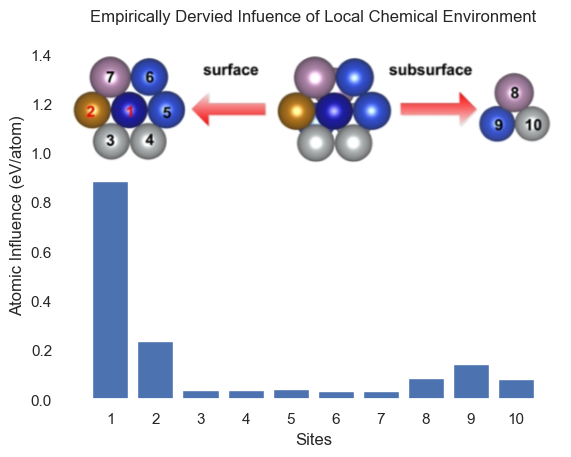

In [3]:
#Perform NN decompistion:
#(See SI of paper for visualization/elaboration)
sites,influences = Model_Manipulator.decompose(visualize=True)

# Step 3: Critical analysis of the NN derived insights 
### (DFT + critical analysis, no code)

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Scaling relation on normal catalysts </strong>
</div>

What we see from the above graph is a non linear site influence based on neighbor positions. Traditionally, the Brønsted–Evans–Polanyi principle states there is a linear scaling relation among adsorbates of the same family and if we plot adsorption energy as a function of mass or relation to other adsorbates, linear trends emerge as seen below.

<p align="center" width="10%">
    <img width="80%" src="images/bep.png"> 
</p>

As a result of this linear relation, simpler catalysts can be expected to have similar influences from neighboring sites due to symmetry. There will be some variation in influences solely due to electron cloud proximities but the effect would still be small regardless. Thus, performing this decomposition technique on a pure metal catalyst would yield something like this:

<p align="center" width="10%">
    <img width="100%" src="images/linearscale.png"> 
</p>

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Scaling relation on multi-component catalysts </strong>
</div>

However, for complex multi-component alloys such as the one shown in this study, we actually <strong>see this scaling relation broken!</strong>

<p align="center" width="10%">
    <img width="100%" src="images/heascale.png"> 
</p>

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Symmetry is the key </strong>
</div>

In short, the increased influence of site 2 is very clearly more pronounced for asymmetric (CHO/COOH) adsorbates compared to symmetric adsorbates (CO). <strong> This is due to enhanced electron cloud interactions as seen below:</strong>

<p align="center" width="10%">
    <img width="60%" src="images/sym.png"> 
</p>

<strong>This results in a previously unreported rotational mechanic</strong> to minimize energy configuration of various intermediates! If we visualize the electron cloud interaction using charge density difference plots, we see that certain elements stabilize specific intermediates! The key lies in the LDOS difference in neighboring atoms d bands resulting in a wide range of adsorption energies for intermediates.

<p align="center" width="10%">
    <img width="75%" src="images/spin.png"> 
</p>

Across an entire CO2RR pathway, this rotational mechanic occurs multiple times. As seen below, the transition from CHO_A to CHOH* would normally be 1 large potential limiting step, but on this HEA surface, it is broken down into 2 unique intermediate steps due to the adsorbate rotation.

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Using this mechanic to design exceptional catalysts </strong>
</div>

<p align="center" width="10%">
    <img width="90%" src="images/path.png"> 
</p>

Based on literature surveys, <strong>this HEA has some of the best potential limiting steps in computational literautre!</strong> In short, what we have done is taken a NRR Catalyst, applied it to the CO2RR catalyst, use ML and data science to analyze its previously unknown mechanics and design a potentially best in field CO2RR catalyst!

<p align="center" width="10%">
    <img width="70%" src="images/survey.png"> 
</p>

# Continuation of this work:

If you want to see my Graph Neural Network and Algorithm Development work where we automate this methodology of taking previously studied catalysts to apply to new reactions for exceptional performance, please see my repository (https://github.com/gariepyz/Automatic-Graph-Representation-Algorithm) or APL ML publication (https://doi.org/10.1063/5.0140487)

<p align="center" width="10%">
    <img width="50%" src="images/gnn.png"> 
</p>